In [547]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import DivergingNorm
import sys
sys.path.insert(1, '../../utils/')
import src_utils
import seaborn as sns

In [582]:
# Heatmap
resid_map = pd.read_csv('../heatmaps/raw_resid_heatmap.csv', index_col=0)

# Masks for clients
clients = np.loadtxt('../../utils/analysis_utils/client_mask.csv').astype(bool)
strong_clients = np.loadtxt('../../utils/analysis_utils/strong_client_mask.csv').astype(bool)
ihb_clients = np.loadtxt('../../utils/analysis_utils/inhibited_clients.csv').astype(bool)
dep_clients = np.loadtxt('../../utils/analysis_utils/dependent_clients.csv').astype(bool)

strong_ihb_clients = strong_clients & ihb_clients
strong_dep_clients = strong_clients & dep_clients

# Following directions from here: 
## https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [549]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
np.set_printoptions(precision=5, suppress=True)

In [550]:
# Fill with means
X = np.zeros((250, 21))
for i, row in enumerate(resid_map.values.copy()):
    idx = np.argwhere(np.isnan(row)).flatten()
    if len(idx) > 0 and len(idx) < 21:
        nanmean = np.nanmean(row)
        row[idx] = nanmean
    elif len(idx) == 21:
        row = np.zeros(21)
    X[i, :] = row

In [551]:
# generate the linkage matrix
X= resid_map.fillna(0.0)
Z = linkage(X, 'ward')

In [552]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

c, coph_dists = cophenet(Z, pdist(X))
c

0.6002512662354994

In [553]:
Z[:20]

array([[  2.     , 204.     ,   0.     ,   2.     ],
       [223.     , 250.     ,   0.     ,   3.     ],
       [247.     , 251.     ,   0.     ,   4.     ],
       [ 52.     , 252.     ,   0.0192 ,   5.     ],
       [ 39.     , 120.     ,   0.09127,   2.     ],
       [196.     , 253.     ,   0.11332,   6.     ],
       [254.     , 255.     ,   0.14586,   8.     ],
       [205.     , 256.     ,   0.16049,   9.     ],
       [ 72.     , 257.     ,   0.16205,  10.     ],
       [ 89.     , 258.     ,   0.21321,  11.     ],
       [166.     , 259.     ,   0.21619,  12.     ],
       [ 40.     , 117.     ,   0.22573,   2.     ],
       [191.     , 260.     ,   0.25891,  13.     ],
       [182.     , 262.     ,   0.30766,  14.     ],
       [ 28.     ,  92.     ,   0.33327,   2.     ],
       [138.     , 261.     ,   0.34931,   3.     ],
       [ 33.     , 181.     ,   0.35246,   2.     ],
       [113.     , 146.     ,   0.35882,   2.     ],
       [162.     , 263.     ,   0.36958,  15. 

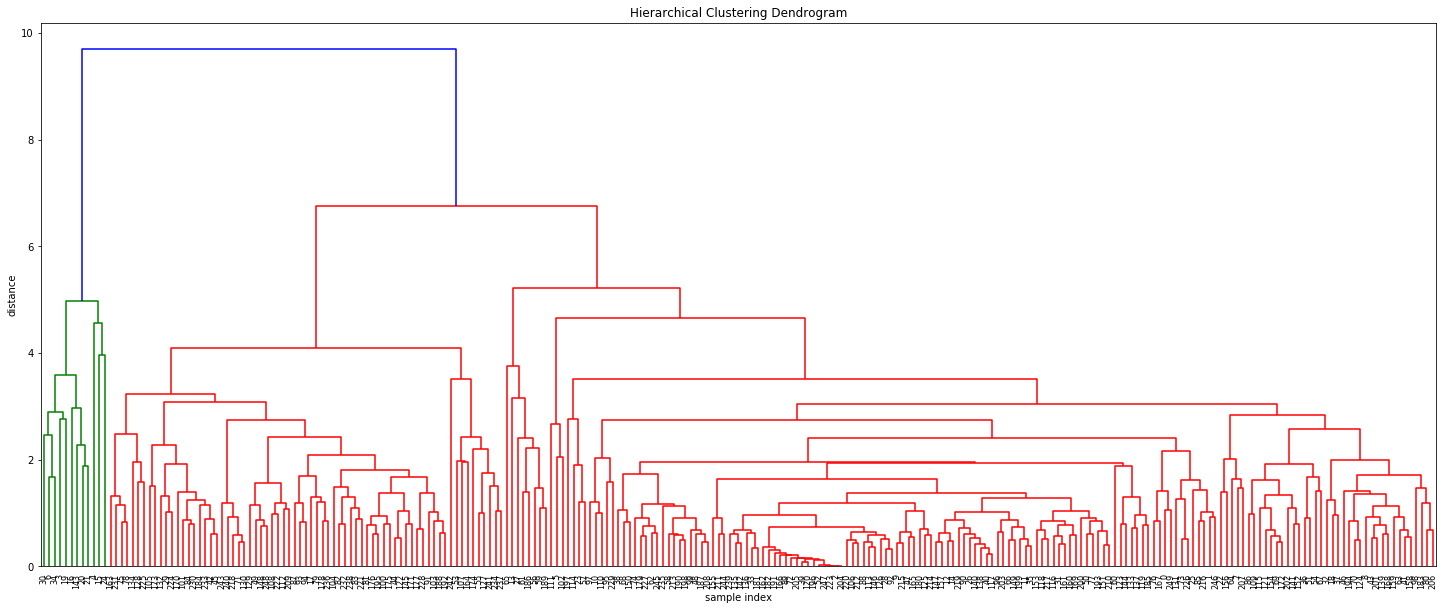

In [554]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [464]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

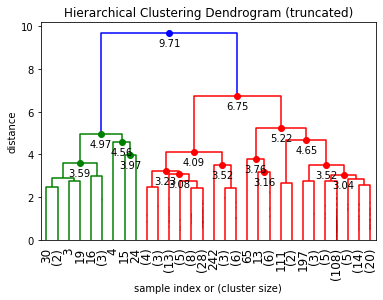

In [555]:
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=3,  # useful in small plots so annotations don't overlap
)
plt.show()

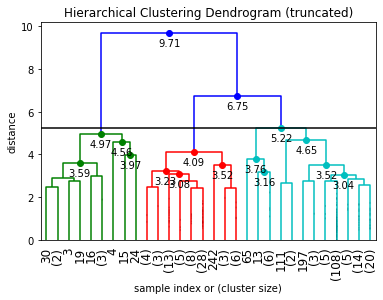

In [556]:
# set cut-off to 50
max_d = 5.22  # max_d as in max_distance
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=3,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()

In [557]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, max_d, criterion='distance')
clusters
clusters = fcluster(Z, 8, criterion='maxclust')
clusters


array([8, 8, 8, 1, 3, 7, 1, 8, 8, 8, 8, 8, 8, 6, 8, 2, 1, 4, 8, 1, 1, 1,
       8, 8, 2, 8, 8, 6, 8, 4, 1, 8, 8, 8, 1, 8, 8, 8, 8, 8, 8, 8, 4, 8,
       4, 4, 8, 8, 8, 4, 8, 8, 8, 5, 8, 5, 6, 8, 8, 6, 8, 6, 8, 8, 8, 6,
       8, 8, 8, 8, 8, 4, 8, 8, 8, 4, 8, 8, 4, 4, 8, 4, 4, 4, 4, 8, 8, 4,
       8, 8, 8, 4, 8, 4, 4, 8, 8, 8, 8, 8, 4, 4, 7, 4, 4, 4, 8, 5, 4, 8,
       8, 7, 4, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 5, 4, 4, 4, 8,
       4, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 1, 8, 4, 8, 8, 4, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 5, 8, 8, 8, 8, 8, 4, 4, 8, 4, 5, 4,
       4, 4, 4, 8, 8, 8, 8, 8, 4, 8, 6, 8, 4, 6, 8, 8, 4, 8, 8, 4, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8, 8, 8, 8, 8, 8, 8, 8, 4, 8,
       8, 4, 4, 8, 4, 4, 8, 8, 4, 8, 4, 4, 4, 4, 5, 8, 4, 5, 4, 8, 4, 5,
       5, 4, 8, 8, 8, 8, 4, 8], dtype=int32)

In [558]:
inv_pos_idx_dict = inv_map = {v: k for k, v in src_utils.__pos_idx_dict__.items()}

In [559]:
clust_dict = {}
for cluster in np.arange(1, max(clusters) + 1):
    clust_dict[cluster] = np.argwhere(clusters == cluster).flatten()

# Look at individual cluster heatmaps

In [560]:
def gen_clust_mask(cluster_arr, cluster, heatmap):
    mask = np.expand_dims(cluster_arr == cluster, axis=1)
    mask = np.repeat(mask, repeats=heatmap.values.shape[1], axis=1)
    return(mask)

In [561]:
clust_masks = {}
for cluster in clust_dict.keys():
    clust_masks[cluster] = gen_clust_mask(clusters, cluster, resid_map)

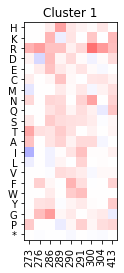

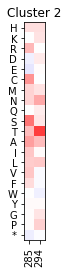

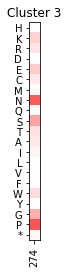

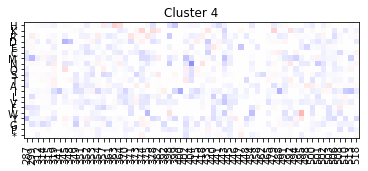

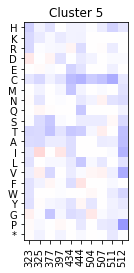

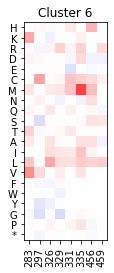

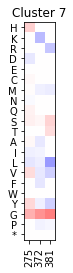

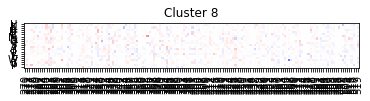

In [562]:
for cluster in clust_dict.keys():
    clust = clust_dict[cluster]
    mask = clust_masks[cluster]
    heatmap = X.values[mask].reshape(-1, 21).T
    fig, ax = plt.subplots()
    plt.imshow(heatmap, cmap='bwr', vmin=-4, vmax=4)
    # Set tick locations
    ax.set_yticks(np.arange(heatmap.shape[0]))
    ax.set_xticks(np.arange(heatmap.shape[1]))

    # Set tick labels
    ax.set_yticklabels(src_utils.__aa_idx_dict__.keys())
    ax.set_xticklabels([str(inv_pos_idx_dict[x]) for x in clust])
    plt.xticks(rotation='vertical')
    plt.title('Cluster {}'.format(cluster))
    plt.show()

In [563]:
sh3_interface=[
270, 271, 289, 290, 292,
293, 295, 311, 314, 315,
327, 328, 329, 330, 331,
332, 333, 334, 336, 338,
340, 342, 403
]

sh2_interface=[
323, 324, 368, 371, 372,
400, 402, 519, 520
]

alphaF_pocket=[
378, 381, 443, 444, 506,
508, 511, 512
]

active_site=[
281, 280, 278, 298, 284,
296, 276, 341, 342, 326,
344, 396, 343, 345, 351,
394, 391, 389, 407
]

src_hsp90_homology_interface=[
337, 338, 339, 340, 341,
342, 343, 345, 346, 347,
351, 352, 355, 371, 375,
382, 398, 399, 400, 402,
404, 412, 415, 417, 418,
513, 515, 516,
]

src_cdc37_homology_interface=[
372, 375, 376, 379, 380,
383, 384, 385, 386, 396,
402, 403, 404, 405, 406,
407, 408, 411, 412, 413,
]

interface_dict = {
    'sh3' : sh3_interface,
    'sh2' : sh2_interface,
    'af' : alphaF_pocket,
    'as' : active_site,
    'hsp90': src_hsp90_homology_interface,
    'cdc37': src_cdc37_homology_interface
}

In [580]:
# Identify which interfaces are present in these clusters
clust_int = {}
for pos in clust_dict[7]:
    pos = inv_pos_idx_dict[pos]
    interfaces = []
    for intfc in interface_dict.keys():
        if pos in interface_dict[intfc]:
            interfaces.append(intfc)
    clust_int[pos] = interfaces

In [585]:
'+'.join([str(inv_pos_idx_dict[x]) for x in clust_dict[1]])

'273+276+286+289+290+291+300+304+413'

In [567]:
clust_dict

{1: array([  3,   6,  16,  19,  20,  21,  30,  34, 143]),
 2: array([15, 24]),
 3: array([4]),
 4: array([ 17,  29,  42,  44,  45,  49,  71,  75,  78,  79,  81,  82,  83,
         84,  87,  91,  93,  94, 100, 101, 103, 104, 105, 108, 112, 122,
        128, 129, 130, 132, 134, 145, 148, 163, 170, 171, 173, 175, 176,
        177, 178, 184, 188, 192, 195, 209, 218, 221, 222, 224, 225, 228,
        230, 231, 232, 233, 236, 238, 240, 243, 248]),
 5: array([ 53,  55, 107, 127, 164, 174, 234, 237, 241, 242]),
 6: array([ 13,  27,  56,  59,  61,  65, 186, 189]),
 7: array([  5, 102, 111]),
 8: array([  0,   1,   2,   7,   8,   9,  10,  11,  12,  14,  18,  22,  23,
         25,  26,  28,  31,  32,  33,  35,  36,  37,  38,  39,  40,  41,
         43,  46,  47,  48,  50,  51,  52,  54,  57,  58,  60,  62,  63,
         64,  66,  67,  68,  69,  70,  72,  73,  74,  76,  77,  80,  85,
         86,  88,  89,  90,  92,  95,  96,  97,  98,  99, 106, 109, 110,
        113, 114, 115, 116, 117, 118, 119, 